<a href="https://colab.research.google.com/github/Chaitra-07/chai/blob/master/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


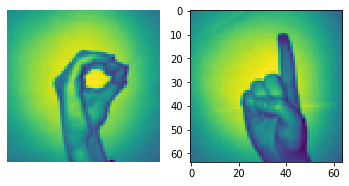

In [5]:
x_1 = np.load('gdrive/My Drive/mydataset/X.npy')
y_1 = np.load('gdrive/My Drive/mydataset/Y.npy')
img_size = 64 # our pixel size.

plt.subplot(1,2,1)   # subplot : sign zero
plt.imshow(x_1[205]) # show image at specified index number
plt.axis('off')      # don't show the axis of sign zero
plt.subplot(1,2,2)   # subplot : sign one
plt.imshow(x_1[822]) # I didn't remove the axis since we can see sizes of our image.

In [6]:
x = np.concatenate((x_1[204:409], x_1[822:1027]), axis=0) # concatenate two array along axis 0 (horizontally)

# Now we create an appropriate array for outputs consisting zeros & ones.
z = np.zeros(205)
o = np.ones(205)
y = np.concatenate((z,o), axis=0).reshape(x.shape[0], 1) # concatenate 'z' & 'o' and make it a 2D array
                                                         # (first it was a 1D array with shape (410, ) )

# let's see the shapes of input and output
print('x shape: {}'.format(x.shape))
print('y shape: {}'.format(y.shape))

x shape: (410, 64, 64)
y shape: (410, 1)


In [7]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
print(x_train.shape)

(369, 64, 64)


In [8]:
x_test.shape[0]


41

In [9]:
x_train_new = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_new = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('x_train new : {}\nx_test_new : {}'.format(x_train_new.shape, x_test_new.shape))

x_train new : (369, 4096)
x_test_new : (41, 4096)


In [10]:
x_train = x_train_new.T
x_test = x_test_new.T
y_train = y_train.T
y_test = y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 369)
x test:  (4096, 41)
y train:  (1, 369)
y test:  (1, 41)


In [0]:
def initialize_params(dimension):
    w = np.full((dimension, 1), 0.01) # first value of weights are 0.01
    b = 0                             # first value of bias is zero
    return w, b                       # return the necessary values that'll be used later in order to finish functions everytime

def sigmoid(z):
    y_head = 1/ (1+ np.exp(-z))
    return y_head

In [0]:
# Forward & Backward Propagation
def forward_backward_propagation(w, b, x_train, y_train):
    # Forward Propagation
    z = np.dot(w.T, x_train) + b                                     # z function consisting parameters w, b 
    y_head = sigmoid(z)                                              # get the probability through sigmoid fucntion
    loss = -(1 - y_train)*np.log(1 - y_head) - y_train*np.log(y_head)# the formula of loss function
    cost = (np.sum(loss)) / (x_train.shape[1])                       # cost function : sum of the loss function of every image
    
    # Backward Propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # derivative of cost function with respect to 'w'
    derivative_bias = np.sum(y_head-y_train) / x_train.shape[1]                 # derivative of cost function with respect to 'b'
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias} # creating a dictionary to store w & b values
    
    return cost,gradients   # return cost and gradients which will be used later

In [0]:
# Updating Parameters
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):

    costs = [] # that'll be used for visualizate cost with respect to iteration count
    index = [] # same here as one row above

    for i in range(number_of_iterarion):    # do it as iteration count
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)  # return updated cost and gradients every iteration by calling function.
     
        w = w - learning_rate * gradients["derivative_weight"]              # update weights
        b = b - learning_rate * gradients["derivative_bias"]                # update bias
        if i%10 == 0:                                            # in every ten iterations
            costs.append(cost)                                   # store cost in list(costs)
            index.append(i)                                      # store iteration number in the list : index
            print ("cost at iteration {} : {}".format(i, cost))
    
    parameters = {"w": w,"b": b}  # most optimized weights & bias is stored in 'parameters' dictionary
    plt.plot(index,costs)         # plotting index vs costs
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters # return parameters which will be used later

In [0]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)   # new "y_head" function full of probabilistic values of x_test data
    y_pred = np.zeros((1,x_test.shape[1])) # form a matrix full of zeros so as to change later
    for i in range(x_test.shape[1]):       # for every values of "y_head"
        if z[0,i] <= 0.5:                  # if y_head <= 0.5 which is our threshold,
            y_pred[0,i] = 0                # then predict it as sign zero.
        else:
            y_pred[0,i] = 1                # else if it's greater than 0.5, then let it be sign one.

    return y_pred               

cost at iteration 0 : 14.077381712973677
cost at iteration 10 : 4.562699761826225
cost at iteration 20 : 3.2163955358866323
cost at iteration 30 : 2.2341440768413743
cost at iteration 40 : 2.1463708695229844
cost at iteration 50 : 2.2812316330752007
cost at iteration 60 : 2.424470522347554
cost at iteration 70 : 2.4679615876359757
cost at iteration 80 : 2.3006357517762654
cost at iteration 90 : 1.971369460065287
cost at iteration 100 : 1.355804170070554
cost at iteration 110 : 0.3694444469535912
cost at iteration 120 : 0.19467876354910033
cost at iteration 130 : 0.1831996442063768
cost at iteration 140 : 0.17371114681861943
cost at iteration 150 : 0.16518141472879583
cost at iteration 160 : 0.1575155982039235
cost at iteration 170 : 0.15062740468402083


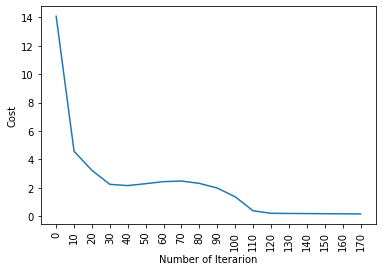

train accuracy: 93.22493224932249
test accuracy:  95.1219512195122


In [21]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, iterations):
    
    dimension =  x_train.shape[0]      # set the dimension on the same value as images
    w,b = initialize_params(dimension) # return w & b

    parameters = update(w, b, x_train, y_train, learning_rate, iterations)  # forward & backward propagation : return brand new updated params
    
    y_pred_test  = predict(parameters["w"],parameters["b"], x_test)  # overfit check if it occured an overfitting situation, then the accuracy of-
    y_pred_train = predict(parameters["w"],parameters["b"], x_train) # test values would be significantly low as opposed to accuracy of train values.      

    print("train accuracy: {}".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100)) # train accuracy
    print("test accuracy:  {}".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))   # test acuracy - no overfitting or underfitting
    
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.02, iterations = 180) # perform logistic regression classification

**LOGISTIC REGRESSION WITH SCIKIT-LEARN**

In [22]:
# Grid Search

from sklearn.model_selection import GridSearchCV    # import Grid Search Cross Validation to find optimujm parameters
from sklearn.linear_model import LogisticRegression # import Logistic Regression
lr = LogisticRegression()  

parameters = {'C':np.logspace(-5,5,11), 'penalty':['l1', 'l2']} # create a dictionary  within Logistic Regression parameters inside
lr_cv = GridSearchCV(lr, parameters, cv = 10)                   # method, parameters of that method, count of Cross Validation.
lr_cv.fit(x_train.T, y_train.T)                                 # fit the model for our values

print('tuned hyperparameters : {}'.format(lr_cv.best_params_))  # Now we'll se best parameters among the "parameters"
print('best score: {}'.format(lr_cv.best_score_))               # Best score of the Logistic Regression with best parameters

tuned hyperparameters : {'C': 100000.0, 'penalty': 'l2'}
best score: 0.981081081081081


In [23]:
# Logistic Regression

lr2 = LogisticRegression(C=1.0, penalty = 'l2') # Use the parameters within Logistic Regression
lr2.fit(x_train.T, y_train.T)                   # fit the model for our train values

print('score for test values: {}'.format(lr2.score(x_test.T, y_test.T))) # test score

score for test values: 0.9512195121951219
